<a href="https://colab.research.google.com/github/kingxl111/ML/blob/main/Practice/Practice_2_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Работа с признаками




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Для наглядности будем использовать данные о вине из библиотеки `sklearn` для всех примеров.

- **Alcohol** — Содержание алкоголя в вине (в процентах).
- **Malic acid** — Уровень маликовой кислоты в вине; органическая кислота, влияющая на вкус и аромат.
- **Ash** — Уровень золы; используется для оценки минералов в вине.
- **Alcalinity of ash** — Щелочность золы; для определения кислотности вина.
- **Magnesium** — Уровень магния, важного минерала для вкуса вина.
- **Total phenols** — Общее содержание фенолов; влияет на цвет, вкус и текстуру вина.
- **Flavanoids** — Содержание флавоноидов в вине; влияет на цвет и вкус.
- **Nonflavanoid phenols** — Уровень нефлаваноидных фенолов; может оказывать влияние на вкус.
- **Proanthocyanins** — Содержание проантоцианидинов; влияет на цвет и вкус вина.
- **Color intensity** — Интенсивность цвета вина; помогает оценить визуальные характеристики.
- **Hue** — Оттенок или цветовой тон; помогает в определении особенностей вина.
- **OD280/OD315 of diluted wines** — Соотношение оптической плотности при 280 и 315 нм; используется для оценки качества вина.
- **Proline** — Уровень пролина, аминокислоты, которая может влиять на вкус и характеристики.

### Для ценителей...

![Чрезмерное употребление алкоголя вредит вашему здоровью!](https://ih1.redbubble.net/image.1652736741.3454/st,small,507x507-pad,600x600,f8f8f8.jpg)

### 18+ Чрезмерное употребление алкоголя вредит вашему здоровью!!!



In [ ]:
from sklearn.datasets import load_wine


## 1. Типы пропусков

Пропуски данных могут возникать по различным причинам. Прежде чем начать обрабатывать пропуски, необходимо оценить их характер. Основными типами пропусков являются:

- **MCAR (Missing Completely at Random)**: Пропуски, которые происходят случайным образом и не зависят ни от одного признака.
- **MAR (Missing at Random)**: Пропуски, вероятность которых может быть предсказана на основе других признаков.
- **MNAR (Missing Not at Random)**: Пропуски, которые зависят от значения самого признака.




In [ ]:
# Загрузка датасета
data = load_wine(as_frame=True)
df = data['data']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# Искусственно добавляем пропуски для демонстрации
df.iloc[::10, 0] = None
df.iloc[::15, 1] = None

In [ ]:
# Проверим количество пропусков в каждом признаке
print("Количество пропусков в каждом признаке:")
print(df.isnull().sum())

Количество пропусков в каждом признаке:
alcohol                         18
malic_acid                      12
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
dtype: int64



## 2. Классические методы заполнения пропусков

Существует несколько стандартных способов их обработки:

### 2.1 Удаление пропусков:
- **Удаление строк**: Этот метод эффективен, если пропусков немного, и удаление не повлияет на общий анализ.
- **Удаление столбцов**: Этот метод может быть полезен, если целый столбец содержит много пропусков.

### 2.2 Заполнение пропусков:
- **Средним (Mean)**: Используется для числовых данных, которые распределены равномерно.
- **Медианой (Median)**: Хорошо подходит для данных с выбросами.
- **Модой (Mode)**: Для категориальных данных или числовых признаков с частыми повторяющимися значениями.

Рассмотрим несколько способов заполнения пропусков в данных:


In [ ]:
# Удаление строк с пропусками
df_drop_rows = df.dropna()
df_drop_rows.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


In [ ]:
# Удаление столбцов с пропусками
df_drop_cols = df.dropna(axis=1)
df_drop_cols.head()

,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Удаляем строки с NaN значениями в столбце 'malic_acid'
df_drop_malic_subset = df.dropna(subset=['malic_acid'])
df_drop_malic_subset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


In [ ]:
# Удаляем столбец 'malic_acid'
df_drop_malic = df.drop(columns=['malic_acid'])
df_drop_malic.head()

,alcohol,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,NaN,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Заполнение пропусков средним значением
df_filled_mean = df.fillna(df.mean())
df_filled_mean.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.024,2.331988,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.200,1.780000,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.160,2.360000,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.370,1.950000,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.240,2.590000,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Заполнение медианой
df_filled_median = df.fillna(df.median())
df_filled_median.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.05,1.845,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.780,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.360,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.950,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.590,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Заполнение модой
df_filled_mode = df.fillna(df.mode().iloc[0])
df_filled_mode.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.37,1.73,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Заполнение специальным значением
df_filled_custom = df.fillna(0)
df_filled_custom.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.00,0.00,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



## 3. Корреляция и тепловая карта (Heatmap)

Корреляция показывает, насколько два признака связаны друг с другом. Она измеряет степень линейной зависимости между ними. Значения корреляции варьируются от -1 до 1:

| Коэффициент корреляции | Значение                  |
|-------------------------|---------------------------|
| 1.0                     | Полная положительная      |
| 0.7 - 1.0               | Сильная положительная     |
| 0.3 - 0.7               | Умеренная положительная    |
| 0 - 0.3                 | Слабая положительная      |
| 0                       | Отсутствие корреляции    |
| -0.3 - 0                | Слабая отрицательная      |
| -0.7 - -0.3            | Умеренная отрицательная    |
| -1.0 - -0.7            | Сильная отрицательная     |
| -1.0                    | Полная отрицательная      |

Тепловая карта (Heatmap) позволяет визуально отобразить корреляции между признаками.


In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = df.corr()

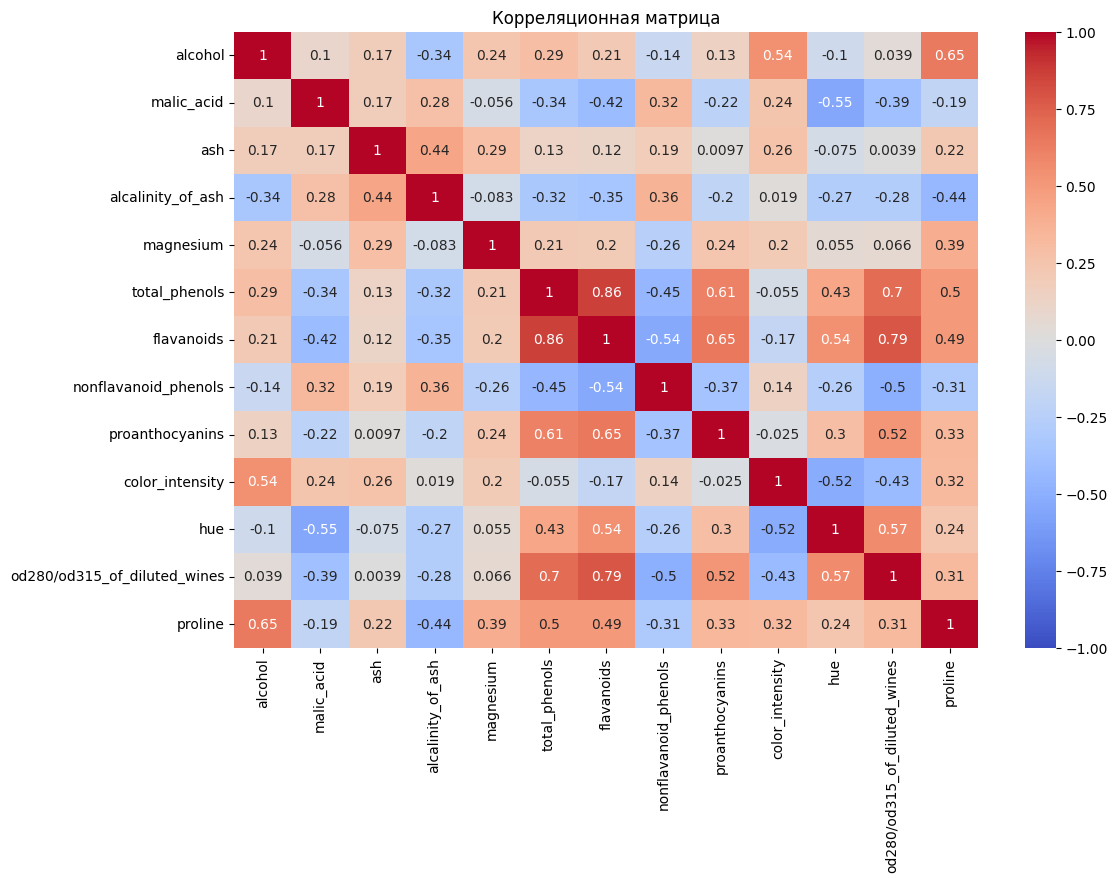

In [ ]:
# Визуализация матрицы корреляций с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
# Рассмотрим признаки с сильной корреляцией (выше 0.7)
high_corr = corr_matrix[(corr_matrix >= 0.7) & (corr_matrix != 1.)].stack()
print(high_corr)

total_phenols                 flavanoids                      0.864564
flavanoids                    total_phenols                   0.864564
                              od280/od315_of_diluted_wines    0.787194
od280/od315_of_diluted_wines  flavanoids                      0.787194
dtype: float64


Допустим, мы обнаружили, что `total_phenols` и `flavanoids` имеют сильную корреляцию. Рассмотрим, что мы можем сделать с этими признаками:

1. **Удаление признака**:
   Если мы решили оставить только один из коррелирующих признаков, мы можем удалить другой:

In [ ]:
df_no_proline = df.drop(columns=['flavanoids'], inplace=False)
df_no_proline.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,NaN,NaN,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,2.93,735.0


2. **Комбинирование признаков**:
   Если они имеют смысл в комбинации, мы могли бы создать новый признак,например, их произведение:

   ```python
   df['flavanoids_phenols'] = df['total_phenols'] * df['flavanoids']
   ```

3. **Использование методов понижения размерности**:

    ![Об этом мы узнаем позже....](https://main.red/m/57N1lq2A/1080x607.jpg)


## 4. Нормализация данных

Нормализация данных необходима, когда признаки имеют различные масштабы. Это помогает моделям машинного обучения лучше работать с данными, а также обеспечивает лучшую сходимость с точки зрения численных методов. Мы рассмотрим два основных метода:

### 4.1 **Min-Max нормализация**

Преобразует данные так, что их значения находятся в диапазоне от 0 до 1.

$$
x' = \frac{x - \text{min}(X)}{\text{max}(X) - \text{min}(X)}
$$

где:
- $x'$ — нормализованное значение,
- $x$ — исходное значение,
- $\text{min}(X)$ — минимальное значение в наборе данных $X$,
- $\text{max}(X)$ — максимальное значение в наборе данных $X$.


### 4.2 **Z-score нормализация (стандартизация)**

Преобразует данные так, что они имеют среднее 0 и стандартное отклонение 1.

$$
z = \frac{x - \mu}{\sigma}
$$

где:
- $z$ — Z-оценка,
- $x$ — исходное значение,
- $\mu$ — среднее значение в наборе данных,
- $\sigma$ — стандартное отклонение в наборе данных.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Min-Max нормализация
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_filled_mean), columns=df.columns)
df_minmax_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.524737,0.314622,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
# Z-score нормализация
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_filled_mean), columns=df.columns)
df_standard_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-2.345199e-15,0.000000,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,2.323604e-01,-0.508368,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1.795512e-01,0.025798,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.777029e+00,-0.351802,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,2.851696e-01,0.237623,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 5. Обработка категориальных признаков.

Не всегда наши признаки могут быть числовыми, иногда их приходится разбивать по определённым классам. Посмотрим, как можно с ними работать.


In [ ]:
data = {
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'M', 'L', 'S'],
    'price': [10.0, 15.0, 12.0, 17.0, 10.0]
}

In [ ]:
df_cat = pd.DataFrame(data)
df_cat

,color,size,price
0,red,S,10.0
1,blue,M,15.0
2,green,M,12.0
3,blue,L,17.0
4,red,S,10.0


1. **One-Hot Encoding**: Мы используем `pd.get_dummies()` для преобразования категориальных переменных в бинарные переменные.

Параметр `drop_first=True` исключает первый уровень, чтобы избежать проблемы мультиколлинеарности.

**Почему так?**

При преобразовании категориальных переменных в бинарные признаки для каждой категории создается отдельный столбец. Если у категориальной переменной есть $n$ уникальных категорий, то после One-Hot будет создано $n$ бинарных переменных. Все $n$ бинарных переменных находятся в линейной зависимости друг от друга, так как зная значения $n-1$ бинарных переменных, мы можем точно определить значение последней.

In [ ]:
df_one_hot = pd.get_dummies(df_cat, columns=['color', 'size'], drop_first=True)
df_one_hot


DataFrame с One-Hot Encoding:


,price,color_green,color_red,size_M,size_S
0,10.0,False,True,False,True
1,15.0,False,False,True,False
2,12.0,True,False,True,False
3,17.0,False,False,False,False
4,10.0,False,True,False,True


2. **Label Encoding**: Для порядковых категорий можно использовать `LabelEncoder` из `sklearn`. В этом примере применяется для преобразования размеров одежды.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df_cat['size_encoded'] = le.fit_transform(df_cat['size'])
df_cat

,color,size,price,size_encoded
0,red,S,10.0,2
1,blue,M,15.0,1
2,green,M,12.0,1
3,blue,L,17.0,0
4,red,S,10.0,2
